<a href="https://colab.research.google.com/github/Woominju/Deep-learning/blob/main/%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CIFAR-10 dataset을 가져옵니다. 그림을 10가지로 분류하는 문제입니다.

from keras.datasets import cifar10


(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


In [2]:
## 그림의 크기가 32x32, 3은 color 사진을 의미합니다.

x_train.shape


(50000, 32, 32, 3)

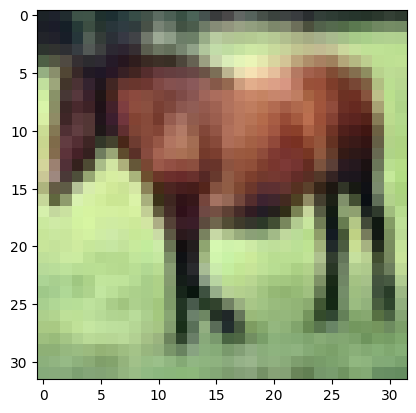

In [3]:
import matplotlib.pyplot as plt

## 그림 한장을 뽑아 모양을 봅시다.

## 아래 그림은 5번 사진을 뽑았지만, 여러분이 다른 사진을 실험해 보세요. 저는 7을 좋아해서 7을 하겠습니당

plt.imshow(x_train[7 ]) ### 여기
plt.show()


In [4]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import numpy as np

### 그림의 픽셀의 숫자를 0부터 1사이로 하기 위해 255로 나누었습니다.

## 우리 그림의 크기는 32x32x3 임을 잊지 마세요.

### 사실 우리는 x_train과 y_train으로만 실습을 할 예정입니다.

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32') / 255

y_train = to_categorical(y_train)   ## 정답을 one-hot encoding합니다.
y_test = to_categorical(y_test)


In [5]:


from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trans_model = ResNet50(include_top=False,  # False로 하여 마지막 soft-max로 이루워진 prediction 부분을 제거합니다.
                 weights="imagenet",
                 input_shape=(32, 32, 3),    ### 여기
                 ## 이 부분에 우리 그림의 사이즈를 넣어 주세요. 그림 사이즈는 위에서 확인할 수 있어요. 아니면 아래 summary에서도...
                 classes=1000)



94765736/94765736 [==============================] - 1s 0us/step


In [6]:
# ResNet50이 어떻게 구성되어 있는지 봅시다.

trans_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [7]:
### trans_model은 pretrain이 된 ResNet부분이고,
### 학습하기에는 너무 거대합니다. 그렇다면 학습을 못하게 해야 합니다.

trans_model.trainable = False


from tensorflow.keras.layers import Flatten, Dropout

model= Sequential()

model.add(trans_model) ### ResNet부분인 trans_model을 여기에 넣었습니다.
model.add(Flatten())

model.add(Dense(256, activation='sigmoid')) ### 여러분이 원하는 모양으로 해 보세요.
model.add(Dense(128, activation='relu'))  ### 여러분이 원하는 모양으로 해 보세요.

model.add(Dense(10,activation='softmax'))   ##  이것은 10개로 분류하는 모델이라는 것 잊지 마세요.


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 24146442 (92.11 MB)
Trainable params: 558730 (2.13 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=1) ## 여기

### verbose=0을 하면 컴퓨터 혼자 묵묵히 일을 하고, verbose=1을 하면 일의 진행상황을 확인할 수 있어요.
### 자료가 크기 때문에, epochs =3, batch_size를 200으로 했는데, epoch마다 약 3분 정도씩 소요되었습니다.
### 이런 점 잘 고려해 보고 실행해 보세요.


Epoch 1/5
782/782 [==============================] - 124s 156ms/step - loss: 2.0743 - accuracy: 0.2260
Epoch 2/5
782/782 [==============================] - 122s 155ms/step - loss: 1.8829 - accuracy: 0.3112
Epoch 3/5
782/782 [==============================] - 122s 156ms/step - loss: 1.8229 - accuracy: 0.3366
Epoch 4/5
782/782 [==============================] - 121s 155ms/step - loss: 1.7873 - accuracy: 0.3530
Epoch 5/5
782/782 [==============================] - 123s 158ms/step - loss: 1.7562 - accuracy: 0.3636
